## IPL Data Analysis



Indian Premier League which is popularly known as IPL is a professional men’s cricket competition held every year in the month of March or April and May. In 2008 this league has been started by Board of Control for Cricket in India (BCCI) and is successfully ongoing with the 13th season in 2020 at UAE. There are different teams ON and OFF the league but eight teams are being consistent with their performance.

The title sponsors for the different seasons are DLF, Pepsi, Vivo, Dream11. IPL being the first ever sporting league to live broadcasted by YOUTUBE in 2010. It ranked sixth among all sporting events with the highest attendees, hence made IPL 2014 most-attended cricket league in the world. This tournament has a rapid growth after 2015, IPL 2019 stands with a brand value of 475 billion rupees and has contributed 11.5 billion rupees to the GDP of the Indian economy with 2015 season.


![](https://www.insidesport.co/wp-content/uploads/2019/12/Banner.jpg)

Here Exploratory Data Analysis is carried on the IPL Dataset provided by Kaggle, there are two csv files

* matches.csv - data provided for each and every match
* deliveries.csv - data provided for ball by ball
* Dataset can be downloaded from here [Kaggle](https://www.kaggle.com/nowke9/ipldata)

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
jovian.commit(project='IPL-analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/priya-mvsrec088/ipl-analysis


'https://jovian.ai/priya-mvsrec088/ipl-analysis'

### Installing and Importing all the libraries required for loading the datasets, data manupulation and data visualization

In [32]:
!pip install numpy  --upgrade --quiet
!pip install pandas --upgrade --quiet

In [34]:
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

In [4]:
## Importing the required packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the datasets using pandas library

In [5]:
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

In [6]:
matches_df.shape

(756, 18)

In [7]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### viewing the dataframe matches.csv and understanding the features

Matches.csv has shape (756,18) indicating 756 data points with 18 features

756 matches played since 2008-2019

Understanding features
* `id` - Unique match ID
* `season` - year in which particular season conducted
* `city and date` - match held city and match date
* `team1` and `team2` - two teams playing head to head
* `toss winner` and `decision` - the team which won the toss, elected to bat or field
* `result` - normal or any unexpected matches endings (eg- weather conditions)
* `dl_applied`- match for which Duckworth-Lewis applied when interrupted by weather conditions or other circumstances
* `win_by_runs` - team batting first has won the match (by X runs), `win_by_wickets` - the team batting second has won the match (by Y wickets)
* `player_of_match` - best performed player
* `venue` - name of the stadium where match held
* `umpire1`, `umpire2`, `umpire3` - name of the umpires

In [8]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Understanding deliveries.csv

* `match id` - unique match ID
* `inning` - which inning of the match
* `batting_team`, `bowling_team`- name of team batting and team bowling
* `over`, `ball` - Indicating number of over and ball count
* `batsmen`, `non_stricker` and `bowler` - name of batsmen, non-stricker and bowler
* `is_super_over` - does super over occured in the match or not
* `wide_runs`, `bye_runs`, `legbye_runs`, `noball_runs`, `penality_runs` - extra runs given by the bowler
* `batsmen_runs` - runs scored by batsmen excluding the extras
* `total_runs` - runs scored by the batsmen including extras

In [9]:
deliveries_df.shape

(179078, 21)

In [10]:
deliveries_df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [11]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
deliveries_df.inning.unique()

array([1, 2, 3, 4, 5])

In [14]:
deliveries_df


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [15]:
matches_df.id.nunique()

756

In [16]:
deliveries_df.match_id.nunique()

756

### Statistical summary of numerical columns for matches.csv and deliveries.csv

In [17]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [18]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Data Cleaning

In [19]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [20]:
print(matches_df['city'].unique())
matches_df['winner'].unique()

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

From the `city` and `winner`  it is observed that 'Bangalore' and 'Bengaluru' represents same city, 'Rising Pune Supergaints' and 'Rising Pune Supergaint','Delhi Daredevils' and  'Delhi Capitals' represents same teams.

In [21]:
matches_df.team1.replace(to_replace = ['Rising Pune Supergiants'], value = ['Rising Pune Supergiant'], inplace = True)
matches_df.team2.replace(to_replace = ['Rising Pune Supergiants'], value = ['Rising Pune Supergiant'], inplace = True)
matches_df.winner.replace(to_replace = ['Rising Pune Supergiants'], value = ['Rising Pune Supergiant'], inplace = True)
matches_df.replace(to_replace = [ 'Delhi Daredevils'], value = ['Delhi Capitals' ] , inplace = True)
deliveries_df.replace(to_replace = ['Delhi Daredevils'], value = [ 'Delhi Capitals'], inplace = True)
matches_df.city.replace(to_replace = ['Bangalore'], value = ['Bengaluru'], inplace = True)

In [22]:
print(matches_df.winner.unique())
print(matches_df.team1.unique())
print(matches_df.team2.unique())
print(matches_df.city.unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Capitals' 'Gujarat Lions' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Pune Warriors' 'Kochi Tuskers Kerala' nan]
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bengaluru' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East Lo

### Handling missing values

In [23]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

umpire3 has 84% missing value, so need to drop this feature

In [24]:
matches_df.drop(['umpire3'], axis = 1, inplace = True)

In [25]:
matches_df.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [26]:
matches_df[matches_df.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bengaluru,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


* Above insights shows four matches have missing values in `winner` ,  `result` - no result and there is no player of the match which   can be concluded that these matches are not played due to some conditions, Hence we can replace missing values in `winner` and `player_of_match` with 'no result'
* There are missing values in the `city`, where `venue` can give an idea about in which city the match was played so imputing missing values in `city` with corresponding `venue` values
* Replacing missing values in `umpire1` and `umpire2` with 'unknown'

In [27]:
matches_df['winner'].fillna('no result', inplace = True)
matches_df['player_of_match'].fillna('no result', inplace = True)
matches_df['city'].fillna(matches_df['venue'], inplace = True)
matches_df['umpire1'].fillna('unknown', inplace = True)
matches_df['umpire2'].fillna('unknown', inplace = True)

In [28]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [29]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

`player_dismisssed`, `dismissal_kind` and `fielder` has more than 90% missing values because since it is a ball by ball data for 756 matches. Each match has 20 overs played by each team competing, hence there will maximum 10 wickets fallen from each team or it can be less than 10 wickets fallen. So most of the values in `player_dismisssed`, `dismissal_kind` and `fielder` are missing values.

In [30]:
jovian.commit(files = ['matches.csv','deliveries.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/priya-mvsrec088/ipl-analysis


'https://jovian.ai/priya-mvsrec088/ipl-analysis'

## Exploratory Data Analysis

Here data is visualised using matplotlib and seaborn libraries and made some insights

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#style settings for the graph
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [33]:
sns.set_style('darkgrid')

### Number of matches played in each season


In [33]:
total_played_matches = matches_df.groupby('season')[['id']].count()


In [34]:
total_played_matches

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


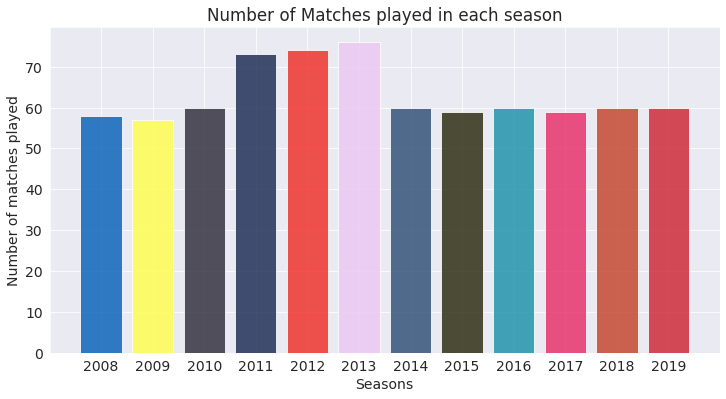

In [35]:
plt.figure(figsize = (12, 6))
plt.title('Number of Matches played in each season')
plt.xlabel('Seasons')
plt.ylabel('Number of matches played')
plt.xticks(total_played_matches.index)
plt.bar(total_played_matches.index, total_played_matches.id, width=0.8, color=['#005DB7','#FFFF48','#292734','#15244C','#EF2920','#ECC5F2',
               '#294A73','#242307','#158EA6','#E82865',
               '#C23E25','#CD202D'], alpha=0.8);

In [35]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

### Total Number of matches won by each team and analysis top three teams which won most of the matches

In [36]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,unknown,unknown


In [37]:
won_match_df = matches_df.groupby('winner')[['id']].count()
won_match_df = won_match_df.reset_index()
won_match_df.columns=['team_name','matches_won']
won_match_df.sort_values(by= 'matches_won', ascending = False, inplace = True)

In [38]:
won_match_df

,team_name,matches_won
7,Mumbai Indians,109
0,Chennai Super Kings,100
6,Kolkata Knight Riders,92
11,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
2,Delhi Capitals,77
9,Rajasthan Royals,75
12,Sunrisers Hyderabad,58
1,Deccan Chargers,29
10,Rising Pune Supergiant,15


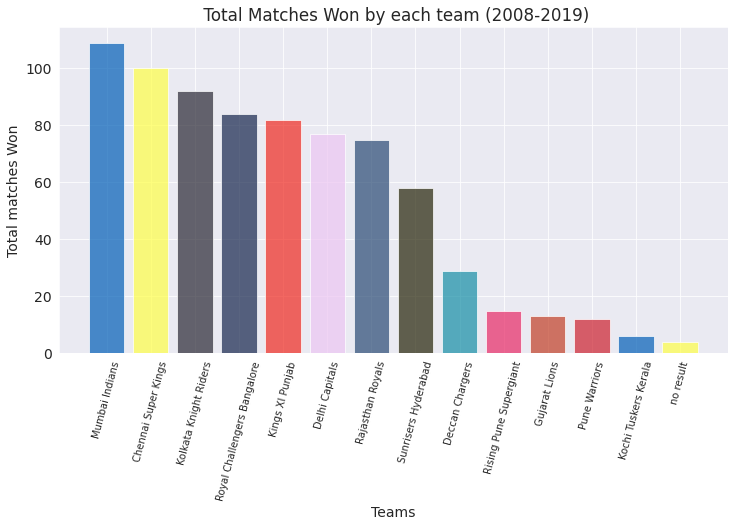

In [39]:
plt.figure(figsize = (12, 6))
plt.title(' Total Matches Won by each team (2008-2019)')
plt.xlabel('Teams')
plt.ylabel('Total matches Won')
plt.xticks(rotation=75,fontsize=10)
plt.bar(won_match_df.team_name, won_match_df.matches_won, color=['#005DB7','#FFFF48','#292734','#15244C','#EF2920','#ECC5F2',
               '#294A73','#242307','#158EA6','#E82865',
               '#C23E25','#CD202D'], alpha=0.7);

From the graph above, the top three teams which won most of the matches are
* Mumbai Indians - 109
* Chennai Super Kings - 100 
* Kolkata Knight Riders - 92

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## Analysis between Played matches and Won matches

In [40]:
matches_team1 = matches_df.groupby('team1')[['id']].count()
matches_team1 = matches_team1.reset_index()
matches_team1.rename(columns = {'team1':'team_name', 'id':'matches_played'}, inplace= True)

In [41]:
matches_team1

,team_name,matches_played
0,Chennai Super Kings,89
1,Deccan Chargers,43
2,Delhi Capitals,78
3,Gujarat Lions,14
4,Kings XI Punjab,91
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,83
7,Mumbai Indians,101
8,Pune Warriors,20
9,Rajasthan Royals,67


In [42]:
matches_team2 = matches_df.groupby('team2')[['id']].count()
matches_team2 = matches_team2.reset_index()
matches_team2.rename(columns = {'team2':'team_name', 'id':'matches_played'}, inplace= True)
matches_play = pd.concat([matches_team1,matches_team2], axis = 0)
matches_play

,team_name,matches_played
0,Chennai Super Kings,89
1,Deccan Chargers,43
2,Delhi Capitals,78
3,Gujarat Lions,14
4,Kings XI Punjab,91
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,83
7,Mumbai Indians,101
8,Pune Warriors,20
9,Rajasthan Royals,67


In [43]:
matches_played_total = matches_play.groupby(['team_name'])[['matches_played']].sum()
matches_played_total = matches_played_total.sort_values(by= 'matches_played', ascending= False).reset_index()

In [44]:
matches_played_total

,team_name,matches_played
0,Mumbai Indians,187
1,Royal Challengers Bangalore,180
2,Kolkata Knight Riders,178
3,Delhi Capitals,177
4,Kings XI Punjab,176
5,Chennai Super Kings,164
6,Rajasthan Royals,147
7,Sunrisers Hyderabad,108
8,Deccan Chargers,75
9,Pune Warriors,46


In [45]:
data_for_matches = matches_played_total.merge(won_match_df, on = 'team_name')
data_for_matches

,team_name,matches_played,matches_won
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,84
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,77
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,100
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


<BarContainer object of 13 artists>

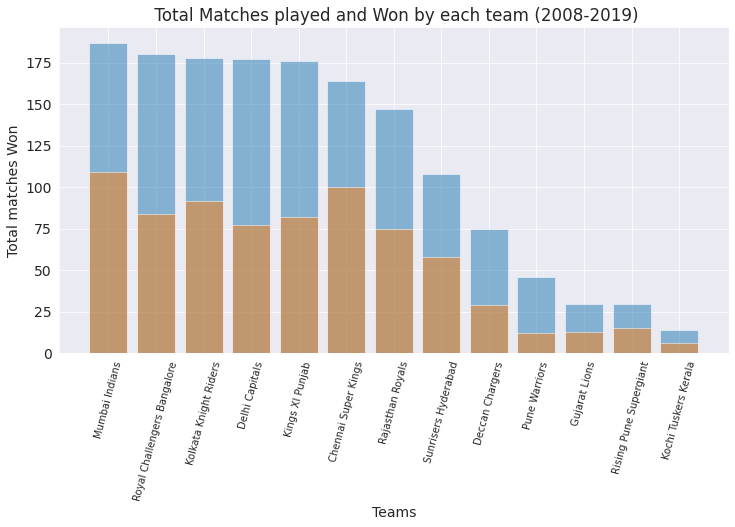

In [46]:
plt.figure(figsize = (12, 6))
plt.title(' Total Matches played and Won by each team (2008-2019)')
plt.xlabel('Teams')
plt.ylabel('Total matches Won')
plt.xticks(rotation=75,fontsize=10)
plt.bar(data_for_matches.team_name, data_for_matches.matches_played, alpha=0.5)
plt.bar(data_for_matches.team_name, data_for_matches.matches_won, alpha=0.5)

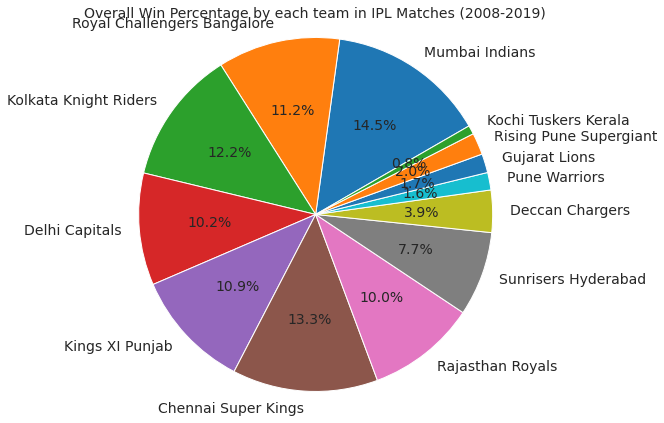

In [47]:
plt.figure(figsize=(7,7))
plt.pie(data_for_matches['matches_won'],labels=data_for_matches['team_name'],
        autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Overall Win Percentage by each team in IPL Matches (2008-2019)',size = 14);

The pie chart insights, MI has win % of 14.5 CSK has win % of 13.3

In [101]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## What is the winning % of each team in all seasons?

In [48]:
data_for_matches


,team_name,matches_played,matches_won
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,84
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,77
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,100
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


In [49]:
data_for_matches['percent_win'] = (data_for_matches.matches_won/data_for_matches.matches_played)*100
data_for_matches

,team_name,matches_played,matches_won,percent_win
0,Mumbai Indians,187,109,58.288770
1,Royal Challengers Bangalore,180,84,46.666667
2,Kolkata Knight Riders,178,92,51.685393
3,Delhi Capitals,177,77,43.502825
4,Kings XI Punjab,176,82,46.590909
5,Chennai Super Kings,164,100,60.975610
6,Rajasthan Royals,147,75,51.020408
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,12,26.086957


* The insights from the pie chart shows that Chennai Super Kings has more Winning percent that Mumbai indians.
* Although the Mumbai Indians has won the most of the matches in all seasons that Chennai super Kings, but the Winning percent is more for Chennai Super Kings because the Chennai has won most of the its played matches which is not followed by Mumbai 

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## How many seasons each team Won?


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


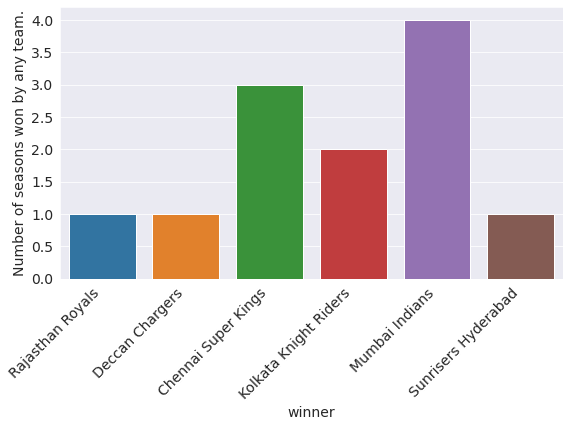

In [50]:
each_season_winner = matches_df.groupby('season')['season','winner'].tail(1)
each_season_winner_sort = each_season_winner.sort_values('season',ascending = True)
sns.countplot('winner', data = each_season_winner_sort)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of seasons won by any team.')
plt.show()

From the above figure it is concluded that Mumbai Indians has won four seasons which  is highest and followed by Chennai super Kings with three seasons winning. 

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## Find out top ten players who awared with Man of the Match frequently and the player with most MOM's?

In [51]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,unknown,unknown


In [52]:
player_of_match = matches_df.groupby(['player_of_match'])[['id']].count()
player_of_match = player_of_match.sort_values('id', ascending = False).head(10)
player_of_match

,id
player_of_match,
CH Gayle,21
AB de Villiers,20
DA Warner,17
RG Sharma,17
MS Dhoni,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64


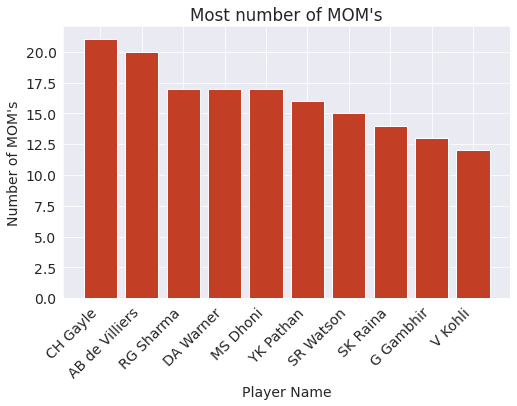

In [53]:
#Top 10 Mom's can alse be obtained this way
matches_df['player_of_match'].value_counts()
print(matches_df['player_of_match'].value_counts()[0:10])
plt.figure(figsize = (8,5))
plt.title("Most number of MOM's")
plt.xlabel('Player Name')
plt.ylabel("Number of MOM's")
plt.xticks(rotation = 45, ha = 'right')
plt.bar(list(matches_df['player_of_match'].value_counts()[0:10].keys()),list(matches_df['player_of_match'].value_counts()[0:10]), color= '#C23E25');

The above insight gives information about top tem players who won the most of the MOM's and CH Gayle being the one on the top of the table to win 21 MOM's.

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## Highest  runs scored by the batsmens till date (2008-2019) and the batsmen with highest runs

In [54]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [41]:
deliveries_df.total_runs.isnull().sum()

0

In [53]:
highest_runs = deliveries_df.groupby('batsman')[['batsman_runs']].sum()
highest_runs = highest_runs.sort_values('batsman_runs', ascending = False).head(10)
highest_runs


,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


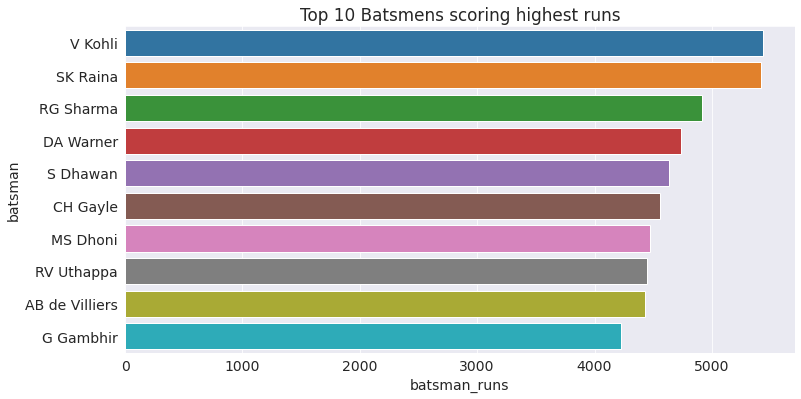

In [57]:
plt.figure(figsize = (12,6))
plt.title('Top 10 Batsmens scoring highest runs')
ay = sns.barplot(x='batsman_runs', y=highest_runs.index, data = highest_runs)

From the above analysis it is learned that Virat Kohli has scored  tops runs of 5434 till season 2019 followed by Suresh Raina with second highest of 5414 runs 

## Top 10 best bowlers

* "run out" is not considered for 'dismissal_kind' while analysing the wickets taken by the bowlers

In [59]:
deliveries_df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [60]:
best_bowlers = deliveries_df[deliveries_df['dismissal_kind']!='run out']
best_bowlers

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [73]:
bowler_wickets= deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowler_wickets = bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index()
bowler_wickets = bowler_wickets.groupby('bowler').count()
b

,bowler,level_1,dismissal_kind
0,A Ashish Reddy,80497,bowled
1,A Ashish Reddy,80502,caught
2,A Ashish Reddy,81750,caught
3,A Ashish Reddy,82253,caught
4,A Ashish Reddy,83084,caught
...,...,...,...
7977,Z Khan,142480,caught
7978,Z Khan,143476,bowled
7979,Z Khan,144752,caught
7980,Z Khan,147288,caught


The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


Text(0.5, 1.0, 'Top 10 Bowlers in IPL- Seasons 2008-2019')

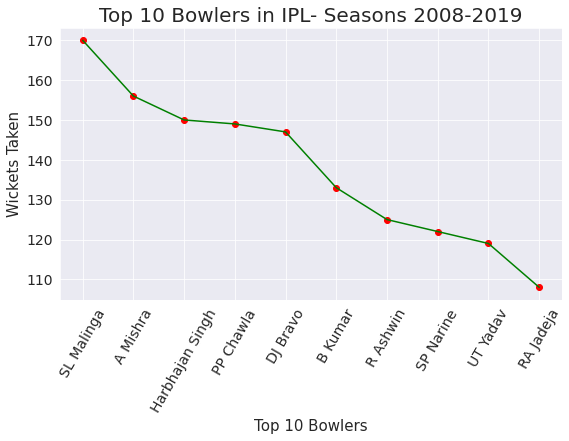

In [75]:
bowling_wickets= deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r')
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers',size=15)
plt.ylabel('Wickets Taken',size=15)
plt.title('Top 10 Bowlers in IPL- Seasons 2008-2019',size=20)

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/priya-mvsrec088/ipl-analysis


'https://jovian.ai/priya-mvsrec088/ipl-analysis'

## Number of matches having Super-over


In [57]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [58]:
df_super_over = deliveries_df[deliveries_df['is_super_over']==1]
df_super_over = df_super_over.reset_index()
# = df_super_over.groupby('match_id').count()
df_super_over

,index,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1,8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,4,0,4,NaN,NaN,NaN
2,8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,6,0,6,NaN,NaN,NaN
3,8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
4,8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,127365,536,3,Kings XI Punjab,Rajasthan Royals,1,7,SE Marsh,GJ Maxwell,CH Morris,1,0,0,1,0,0,0,1,1,SE Marsh,run out,NaN
77,127366,536,4,Rajasthan Royals,Kings XI Punjab,1,1,SR Watson,JP Faulkner,MG Johnson,1,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
78,127367,536,4,Rajasthan Royals,Kings XI Punjab,1,2,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,1,0,4,1,5,NaN,NaN,NaN
79,127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [59]:
df_super_over.match_id.nunique()

7

The analysis above concludes that 7 matches has super-over from 2008 to 2019

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/priya-mvsrec088/ipl-analysis


'https://jovian.ai/priya-mvsrec088/ipl-analysis'

## visualizing the outliers in `win_by_runs in matches.csv

In [60]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


<AxesSubplot:xlabel='win_by_runs'>

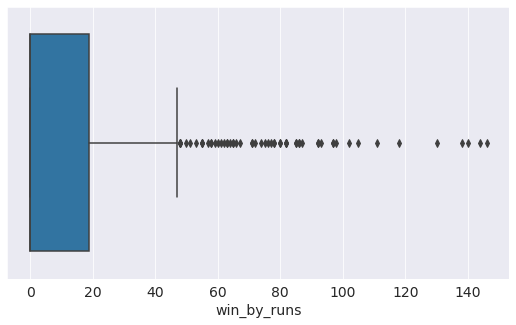

In [61]:
sns.boxplot(x= 'win_by_runs', data = matches_df)

In [62]:
win_by_runs_outliers = matches_df[matches_df['win_by_runs']>45]
win_by_runs_outliers

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan
32,33,2017,Pune,2017-04-29,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus
35,36,2017,Hyderabad,2017-04-30,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,7919,2018,Delhi,27/04/18,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Delhi Capitals,55,0,SS Iyer,Feroz Shah Kotla,C Shamshuddin,S Ravi
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary


From the boxplot if a match is won by runs almost greater than 45 is considered as outliers, as know that winning a match with more difference in runs  is considered as greatest achievement and the team has high net runrate post the match. 

In [93]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## Analysing the teams which Won by Runs

* `win_by_runs` means the team batting first has Won the match


In [63]:
batting_first = matches_df[matches_df['win_by_runs']!=0]

In [64]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,unknown,unknown
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


* Analysing the distribution of runs by which teams are winning batting first

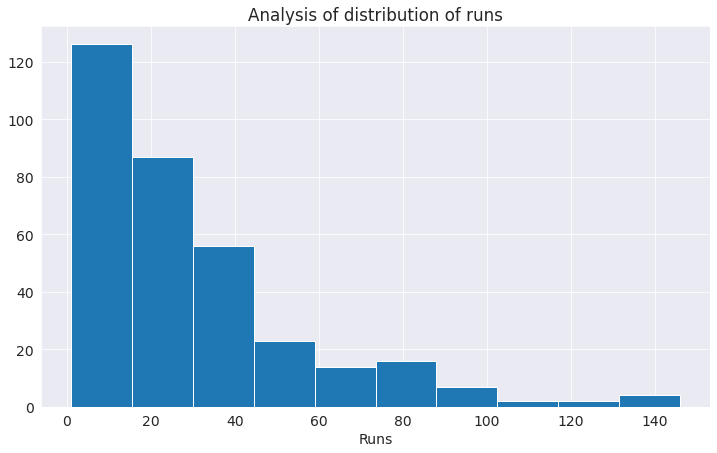

In [72]:
plt.figure(figsize = (12,7))
plt.title('Analysis of distribution of runs')
plt.xlabel('Runs')
plt.hist(batting_first.win_by_runs, bins = 10);

From the above insight about 130 matches teams Won with 0-20 runs, about 20 matches teams has won with 40-60 runs. There are very few matches where teams has won with more than 100 runs 

## Top 5 teams which has won more number of matches batting first

In [66]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Delhi Capitals                 28
Rajasthan Royals               27
Deccan Chargers                18
Rising Pune Supergiant          7
Pune Warriors                   6
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

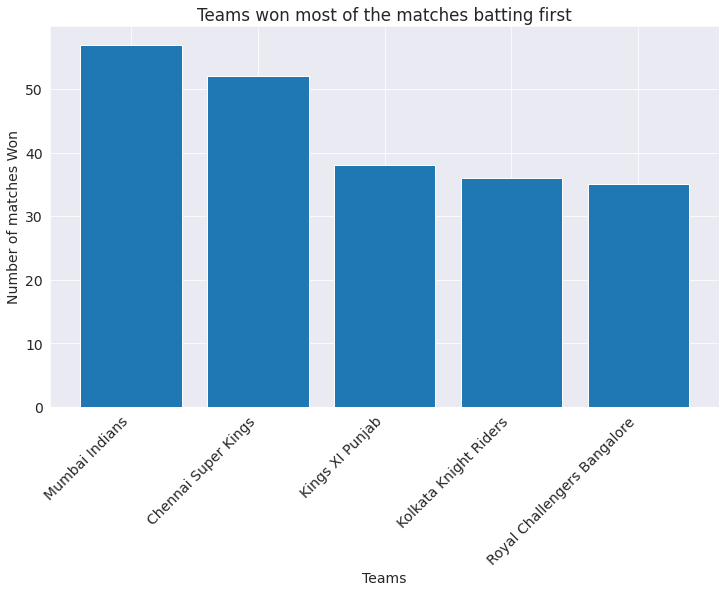

In [67]:
plt.figure(figsize = (12,7))
plt.title('Teams won most of the matches batting first')
plt.xlabel('Teams')
plt.ylabel('Number of matches Won')
plt.xticks(rotation = 45, ha = 'right')
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),
        list(batting_first['winner'].value_counts()[0:5]));

Here MI has won most of the matches 57 while batting first and then by CSK with 52 matches win. It is learned that CSK and KKR has more difference in winning the matches at batting first

### Win % of each team batting first

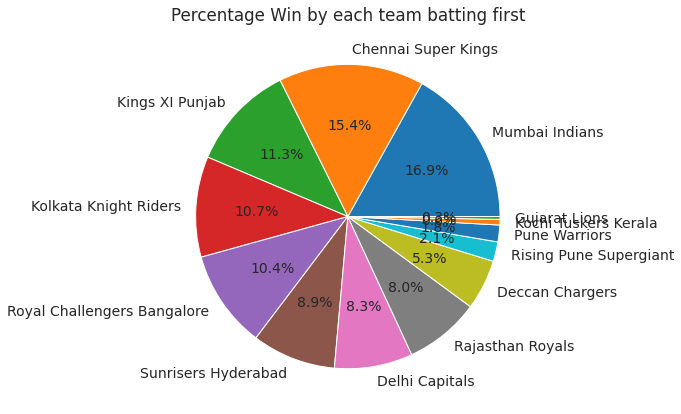

In [68]:
plt.figure(figsize = (7,7))
plt.title('Percentage Win by each team batting first')
plt.pie(list(batting_first['winner'].value_counts()),
        labels = list(batting_first['winner'].value_counts().keys()),
                     autopct ='%0.1f%%');

The Pie chart gives an idea that MI has 16.9 win percent batting first followed by CSK and KKR with 15.4% and 11.3%, Deccan Chargers, Rising Pune Supergaint, Pune Warriors, Gujarat Lions has ver less win percent.

## Analysing the teams which won by wickets

In [69]:
batting_2nd = matches_df[matches_df['win_by_wickets']!=0]
batting_2nd

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,unknown,unknown


* analysing the distribution of wickets by which teams are winning batting second

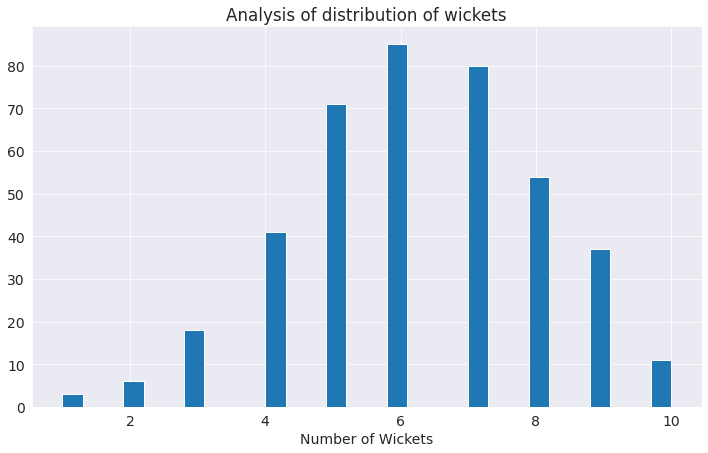

In [74]:
plt.figure(figsize = (12,7))
plt.title('Analysis of distribution of wickets')
plt.xlabel('Number of Wickets')
plt.hist(batting_2nd['win_by_wickets'], bins = 30);

From above plot about 85 matches won by 6 wickets while batting second, there are very less matches <5 won by 1 wicket and about 10 matches won by 10 wickets while batting second

## Top 5 teams which won most of the matches while batting second

In [76]:
batting_2nd['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Delhi Capitals                 48
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiant          8
Pune Warriors                   6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


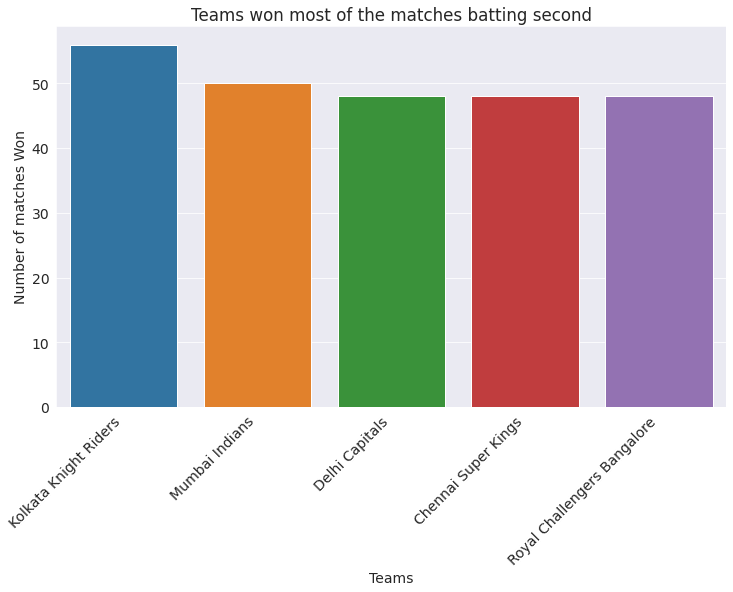

In [84]:
plt.figure(figsize = (12,7))
plt.title('Teams won most of the matches batting second')
plt.xlabel('Teams')
plt.ylabel('Number of matches Won')
plt.xticks(rotation = 45, ha = 'right')
sns.barplot(list(batting_2nd['winner'].value_counts()[0:5].keys()),
            list(batting_2nd['winner'].value_counts()[0:5]));

KKR has won 56 matches batting second followed by MI with 50 matches. After kIXP, SRH and Gujarat Lions along with rest of the remaining teams ahs very low match wins while batting second 

### Win % of each team batting second

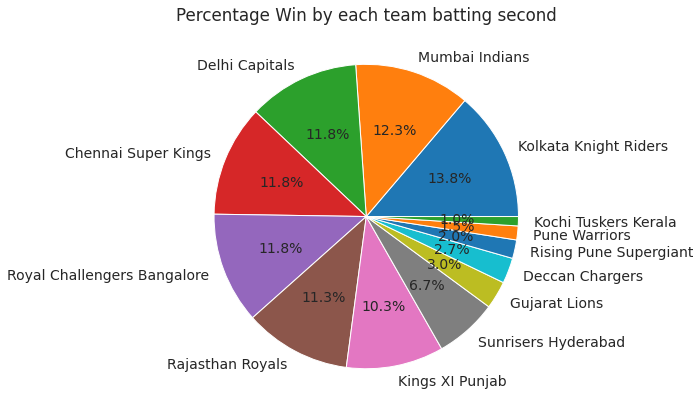

In [80]:
plt.figure(figsize = (7,7))
plt.title('Percentage Win by each team batting second')
plt.pie(list(batting_2nd['winner'].value_counts()),
        labels = list(batting_2nd['winner'].value_counts().keys()),
                     autopct ='%0.1f%%');

KKR has highest winning percent of 13.8 followed by MI with 12.3%, Kochi Tuskers Kerala has ver less winning percent while batting second.

In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

Which city has hosted most of the matches

In [85]:
matches_df.city.value_counts()

Mumbai                                 101
Bengaluru                               80
Kolkata                                 77
Delhi                                   74
Hyderabad                               64
Chennai                                 57
Jaipur                                  47
Chandigarh                              46
Pune                                    38
Durban                                  15
Visakhapatnam                           13
Centurion                               12
Ahmedabad                               12
Rajkot                                  10
Mohali                                  10
Dharamsala                               9
Indore                                   9
Johannesburg                             8
Dubai International Cricket Stadium      7
Abu Dhabi                                7
Cuttack                                  7
Ranchi                                   7
Cape Town                                7
Port Elizab

Highhest matches of 101 are played at Mumbai

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## Which team has more number of Toss Wins

In [78]:
matches_df.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Mumbai Indians has more number of Toss Wins 98 followed by Kolkata Knight Riders

## Relationship between toss win and match win

In [87]:
import numpy as np

In [88]:
np.sum(matches_df['toss_winner']== matches_df['winner'])

390

Percentage match win after the toss win

In [91]:
390/756

0.5158730158730159

51% of IPL matches has match win along with the toss win

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Number of matches Won by CSK and MI when they fought head to head

In [73]:
data_csk_mi = matches_df.loc[(matches_df['team1']=='Mumbai Indians') | (matches_df['team1']=='Chennai Super Kings'),]
data_csk_mi = data_csk_mi.loc[(matches_df['team2']=='Mumbai Indians') | (matches_df['team2']=='Chennai Super Kings'),]
data_csk_mi

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani


Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64


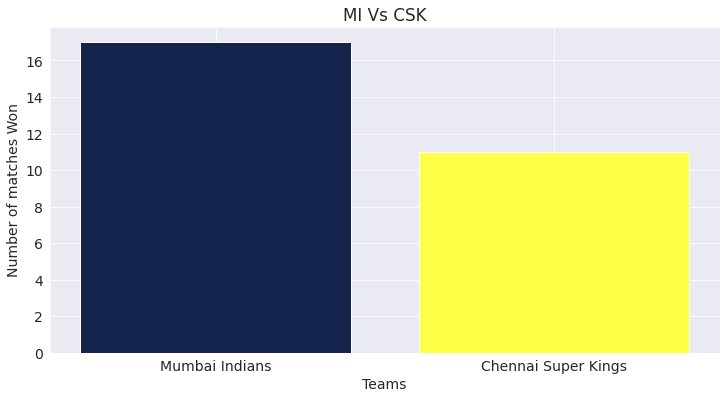

In [75]:
csk_mi_matches = data_csk_mi['winner'].value_counts()
print(csk_mi_matches)
plt.figure(figsize = (12,6))
plt.title('MI Vs CSK')
plt.xlabel('Teams')
plt.ylabel('Number of matches Won')
plt.bar(csk_mi_matches.keys(),csk_mi_matches, color =['#15244C','#FFFF48']);

The graphical representaion above shows MI had Won most of the matches that is 17 out of 28 matches when CSK is competing MI.

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "priya-mvsrec088/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/priya-mvsrec088/ipl-analysis


'https://jovian.ml/priya-mvsrec088/ipl-analysis'

## Analysing match wise data

In [33]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [34]:
#Extracting all unique match ID's
deliveries_df['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [35]:
deliveries_df['match_id'].nunique()

756

we have 756 unique matches, but the `match_id` is continous till 636 and there after the match id is given with different set of range and does'nt match with the `id` in matches.csv 

## Analysing the first match

In [36]:
match_1 = deliveries_df[deliveries_df['match_id']==1]

In [37]:
match_1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,YS Chahal,A Choudhary,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


T20 match has 240 balls, 120 balls for each innings. In first match there are 248 records which means this mach has 8 extras (wides, no balls, legbye, etc)

The first match is between SRH and RCB, Let's analyse first and second innings

subsetting first match by first innings- SRH batting
Analysing the batsmen runs and dissmissal kind

In [38]:
SRH = match_1[match_1['inning']==1]

In [41]:
SRH['batsman_runs'].sum()

200

In [39]:
SRH['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

SRH has score 200 runs while batting first,While SRH batting there are 32 - dot balls, 57 - 1's, 17 - 4's, 9 - 6's, 9 - 2's, 1 - 3's 

In [42]:
SRH['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

4 wickets fallen for SRH, 3 were caught and 1 wicket was bowled

Analysing the second innings - RCB batting

In [43]:
RCB = match_1[match_1['inning']==2]

In [44]:
RCB['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [45]:
RCB['batsman_runs'].sum()

166

In [46]:
RCB['dismissal_kind'].value_counts()

caught     6
bowled     2
run out    2
Name: dismissal_kind, dtype: int64

RCB stared it's innings with a target of 201, there were 49 dot balls, 15 - 4's, 8 - 6's, 44 singles and got all out for 166 runs. Hence the match winner is SRH

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
